# Quasar luminosity function

In [1]:
# Imports
import astropy.constants as c
import astropy.units as u
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib inline
matplotlib.rc('font',size=20)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
# Parameters
outputDir='../../../output/cooling_old/'
#outputDir='../../../output/Hen15_betaprof_fixinfall/'
obsDir='../../../../Obsdata/'
filePrefix='SA_output_'
filePostfix='.h5'
snap='58'
firstFile=40
lastFile=40
maxFile=512
# Bins for hostogram and plotting
binperdex=5
xrange=np.array([9,13])
nbin=(xrange[1]-xrange[0])*binperdex
# Simulation parameters (read from file!)
hubble=0.673
boxside=480.28  # Units Mpc/h 

In [8]:
# First determine the size of the arrays that we need to hold the data
nGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal+=len(f[snap])
print('nGal=',nGal)

# Declare numpy arrays to hold the data
Type=np.empty(nGal)
StellarMass=np.empty(nGal)
QAR=np.empty(nGal)
RAR=np.empty(nGal)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        Type[iGal:iGal+nGalFile]=f[snap]['Type']
        StellarMass[iGal:iGal+nGalFile]=f[snap]['StellarMass']
        QAR[iGal:iGal+nGalFile]=f[snap]['QuasarAccretionRate']
        RAR[iGal:iGal+nGalFile]=f[snap]['RadioAccretionRate']
        iGal+=nGalFile

nGal= 14629


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


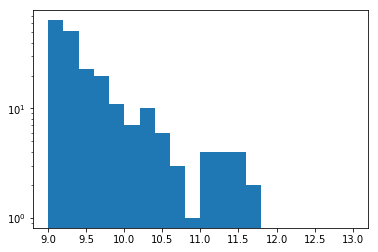

In [9]:
qlf=0.1*2e30*(3e8)**2/(3.16e7*4e26)*(QAR+RAR)

# Put into bins and normalise to number per unit volume (Mpc/h) per dex
nobj,bins,junk=plt.hist(np.log10(qlf), bins=nbin, range=xrange, log=True)
y=nobj*maxFile/((lastFile-firstFile+1)*boxside**3)*binperdex

# Plot at centre of bins
x=0.5*(bins[:-1]+bins[1:])


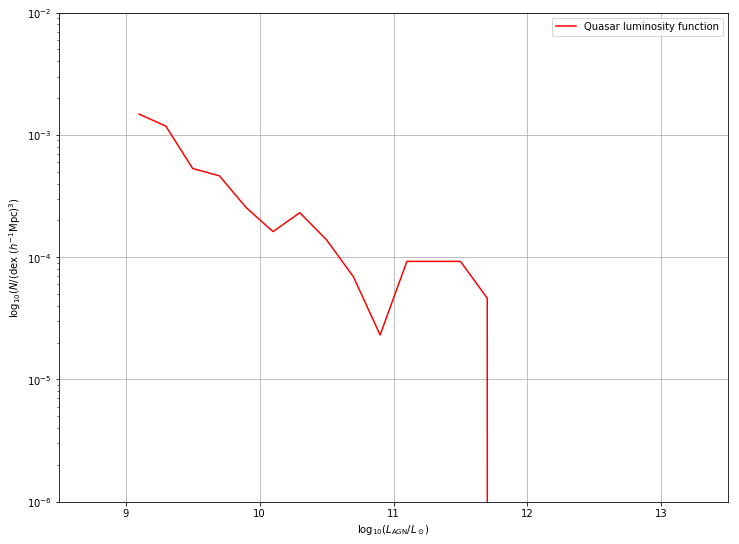

In [12]:
# Plot SMF of data
plt.figure(0,figsize=(12,9))
plt.semilogy(x,y,'-r',label='Quasar luminosity function')
plt.axis([8.5,13.5,1e-6,1e-2])
plt.xlabel(r'$\log_{10}(L_\mathrm{AGN}/L_\odot)$')
plt.ylabel(r'$\log_{10}(N/(\mathrm{dex}\ (h^{-1}\mathrm{Mpc})^3)$')
plt.grid(True)

plt.legend()
plt.savefig('figs/QLF_'+outputDir.split('/')[-2]+'.png')